## Logistic regression for a binary classification with a regularization

<hr>

## Import library and load the data from the files

In [462]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

50
50


## Plot the training data

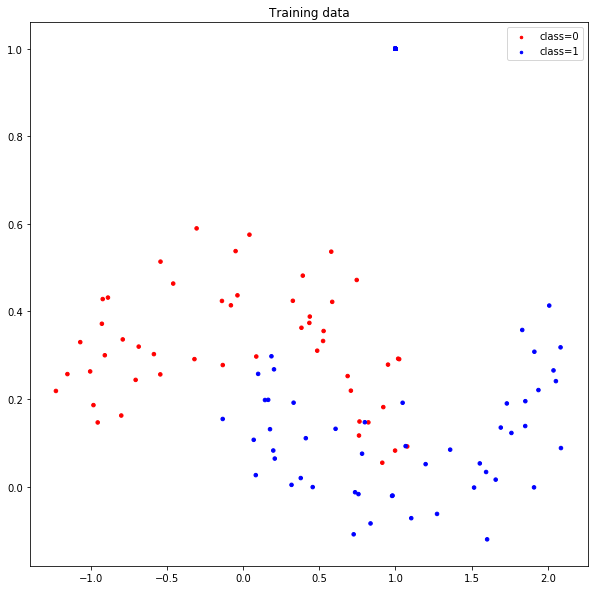

In [252]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## Plot the testing data

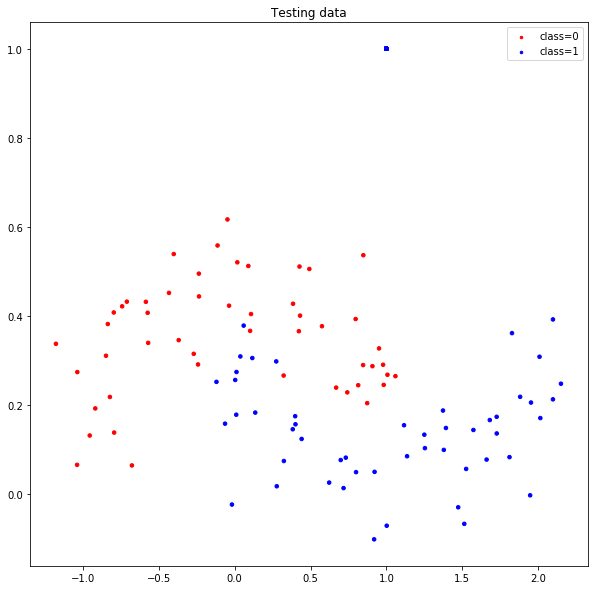

In [253]:
plt.figure(2,figsize=(10,10))
plt.scatter(x1_test, x2_test, s=idx_class0_test*50, c='r', marker='.', label='class=0') 
plt.scatter(x1_test, x2_test, s=idx_class1_test*50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend()
plt.show()

## Define a logistic regression loss function and its gradient

In [469]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    # p = sigmoid(X@w)
    p = X@w
    return p

# loss function definition
def loss_func(y_pred,y,w,ld): 
    n = len(y)
    max(z, 0) - z * y + log(1 + exp(-abs(z)))
    # loss = (y_pred-y).T@(y_pred-y)/n + (ld/2)*(w.T @ w)
    # loss = (-y.T @ np.log(y_pred) - (1-y).T @ np.log(1-y_pred)) / n + (ld/2)*(w.T @ w)
    # cross entropy loss function 이 nan이나 inf 결과를 내는 이유
    # https://blog.naver.com/gyrbsdl18/221068979134
    return loss

# gradient function definition
def grad_loss(y_pred,y,X,w,ld):
    n = len(y)
    grad = X.T @ (y_pred - y) * 2 / n + ld*w
    return grad

# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter, ld):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function   
        #print('y_pred =',y_pred)
        grad_f = grad_loss(y_pred,y,X,w,ld) # gradient of the loss
        #print('grad_f =',grad_f)
        w = (1 - ld*tau)*w - tau * grad_f # update rule of gradient descent  
        #print('w =',w)
        L_iters[i] = loss_func(y_pred,y,w,ld) # save the current loss value 
        
    return w, L_iters  

## Define a prediction function and run a gradient descent algorithm

In [470]:
# construct the data matrix X, and label vector y
# train data
n_train = data_train.shape[0]
X_train = np.ones([n_train,100])

num = 0
for i in range(10):
    for j in range(10):
        X_train[:, num] = (x1_train**i)*(x2_train**j)
        num = num+1
        
y_train = data_train[:,2][:,None] # label 

# test data
n_test = data_test.shape[0]
X_test = np.ones([n_test,100])

num = 0
for i in range(10):
    for j in range(10):
        X_test[:, num] = (x1_test**i)*(x2_test**j)
        num = num+1
        
y_test = data_test[:,2][:,None] # label 

# run gradient descent algorithm
start = time.time()
w_init = np.random.rand(100)[:,None]
#print(w_init)
tau = 1e-2; max_iter = 2000; ld=1e-2
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,max_iter,ld)
w_test, L_iters_test = grad_desc(X_test,y_test,w_init,tau,max_iter,ld)
print('Time=',time.time() - start)

# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c='b')
plt.plot(np.array(range(max_iter)), L_iters_test, c='r')
# plt.xlabel('Iterations')
# plt.ylabel('Loss value')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Plot the decision boundary

(2500, 100)


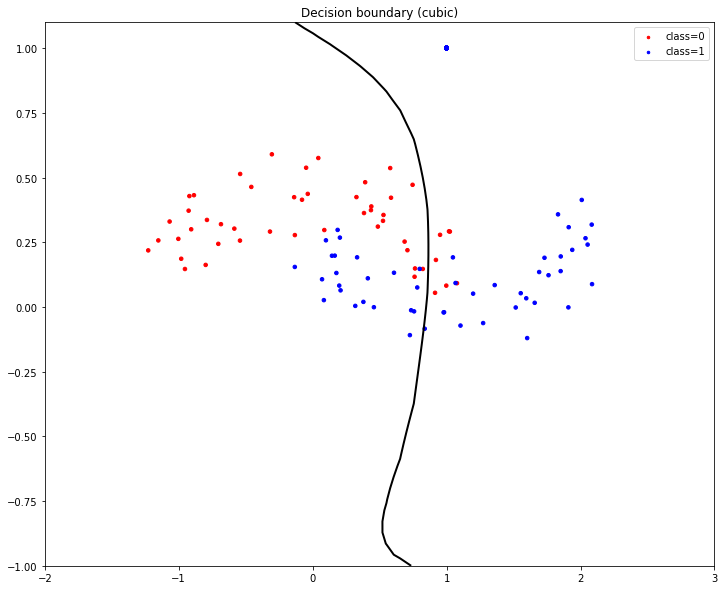

In [443]:
# compute values p(x) for multiple data points x
x1_min, x1_max = -2, 3 # min and max of grade 1
x2_min, x2_max = -1, 1.1 # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),100]) 

print(X2.shape)

num = 0
for i in range(10):
    for j in range(10):
        X2[:, num] = (xx1.reshape(-1)**i)*(xx2.reshape(-1)**j)
        num = num + 1
        
p_train = f_pred(X2,w_train)
p_train = p_train.reshape((len(xx1), len(xx2)))

# plot
plt.figure(4,figsize=(12,10))
plt.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (cubic)')
plt.show()

## Plot the probability map

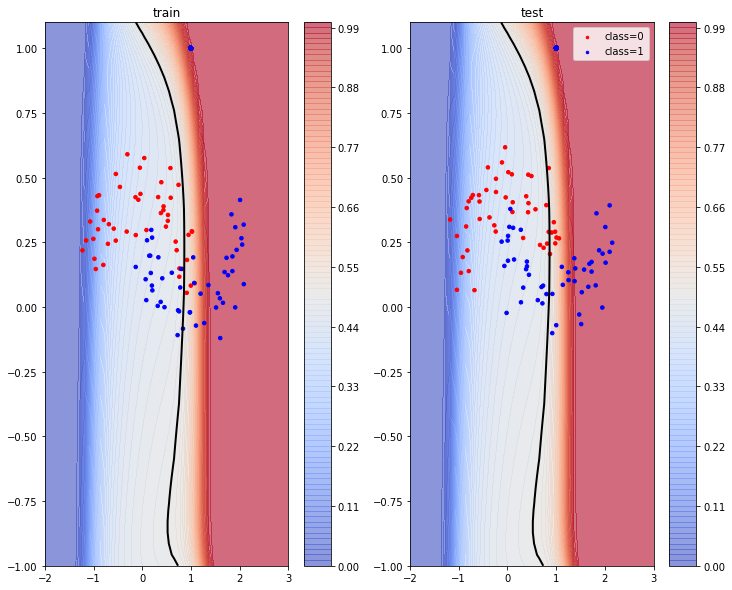

In [444]:
# plot
fig = plt.figure(4,figsize=(12,10))
ax1 = fig.add_subplot(121)
ax1.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax1.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
ax1.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
ax1.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax1.set_title('train')
cbar1 = plt.colorbar(ax)
cbar1.update_ticks()

ax2 = fig.add_subplot(122)
ax2.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax2.scatter(x1_test, x2_test, s=idx_class0_test*50, c='r', marker='.', label='class=0') 
ax2.scatter(x1_test, x2_test, s=idx_class1_test*50, c='b', marker='.', label='class=1')
ax2.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax2.legend()
ax2.set_title('test')
cbar2 = plt.colorbar(ax)
cbar2.update_ticks()

## Compute the classification train accuracy

In [466]:
accuracy_train = []


# 1e-5
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,200000,1e-5)
p_train = f_pred(X_train,w_train)
idx_class1_pred_train = p_train.reshape(-1)*idx_class1_train
idx_class0_pred_train = p_train.reshape(-1)*idx_class0_train
correct_data_train = np.count_nonzero(idx_class1_pred_train >= 0.5) + (np.sum(idx_class0_train) - np.count_nonzero(idx_class0_pred_train >= 0.5))
accuracy_train.append(correct_data_train / n * 100)


# 1e-4
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,75000,1e-4)
p_train = f_pred(X_train,w_train)
idx_class1_pred_train = p_train.reshape(-1)*idx_class1_train
idx_class0_pred_train = p_train.reshape(-1)*idx_class0_train
correct_data_train = np.count_nonzero(idx_class1_pred_train >= 0.5) + (np.sum(idx_class0_train) - np.count_nonzero(idx_class0_pred_train >= 0.5))
accuracy_train.append(correct_data_train / n * 100)


# 1e-3
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,25000,1e-3)
p_train = f_pred(X_train,w_train)
idx_class1_pred_train = p_train.reshape(-1)*idx_class1_train
idx_class0_pred_train = p_train.reshape(-1)*idx_class0_train
correct_data_train = np.count_nonzero(idx_class1_pred_train >= 0.5) + (np.sum(idx_class0_train) - np.count_nonzero(idx_class0_pred_train >= 0.5))
accuracy_train.append(correct_data_train / n * 100)


# 1e-2
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,10000,1e-2)
p_train = f_pred(X_train,w_train)
idx_class1_pred_train = p_train.reshape(-1)*idx_class1_train
idx_class0_pred_train = p_train.reshape(-1)*idx_class0_train
correct_data_train = np.count_nonzero(idx_class1_pred_train >= 0.5) + (np.sum(idx_class0_train) - np.count_nonzero(idx_class0_pred_train >= 0.5))
accuracy_train.append(correct_data_train / n * 100)


# 1e-1
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,3000,1e-1)
p_train = f_pred(X_train,w_train)
idx_class1_pred_train = p_train.reshape(-1)*idx_class1_train
idx_class0_pred_train = p_train.reshape(-1)*idx_class0_train
correct_data_train = np.count_nonzero(idx_class1_pred_train >= 0.5) + (np.sum(idx_class0_train) - np.count_nonzero(idx_class0_pred_train >= 0.5))
accuracy_train.append(correct_data_train / n * 100)

print(accuracy_train)
for i in range(5):
    print ('lambda = 1e-'+str(5-i)+', Training Accuracy (%) =', accuracy_train[i])

# print('total number of data =', n)
# print('total number of correctly classified data = ', correct_data_train)
# print('accuracy(%) = ', correct_data_train / n * 100)

[98.5, 97.5, 96.0, 90.0, 85.5]
lambda = 1e-5, Training Accuracy (%) = 98.5
lambda = 1e-4, Training Accuracy (%) = 97.5
lambda = 1e-3, Training Accuracy (%) = 96.0
lambda = 1e-2, Training Accuracy (%) = 90.0
lambda = 1e-1, Training Accuracy (%) = 85.5


## Compute the classification test accuracy

In [465]:
accuracy_test = []


# 1e-5
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,200000,1e-5)
p_test = f_pred(X_test,w_train)
idx_class1_pred_test = p_test.reshape(-1)*idx_class1_test
idx_class0_pred_test = p_test.reshape(-1)*idx_class0_test
correct_data_test = np.count_nonzero(idx_class1_pred_test >= 0.5) + (np.sum(idx_class0_test) - np.count_nonzero(idx_class0_pred_test >= 0.5))
accuracy_test.append(correct_data_test / n * 100)


# 1e-4
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,75000,1e-4)
p_test = f_pred(X_test,w_train)
idx_class1_pred_test = p_test.reshape(-1)*idx_class1_test
idx_class0_pred_test = p_test.reshape(-1)*idx_class0_test
correct_data_test = np.count_nonzero(idx_class1_pred_test >= 0.5) + (np.sum(idx_class0_test) - np.count_nonzero(idx_class0_pred_test >= 0.5))
accuracy_test.append(correct_data_test / n * 100)


# 1e-3
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,25000,1e-3)
p_test = f_pred(X_test,w_train)
idx_class1_pred_test = p_test.reshape(-1)*idx_class1_test
idx_class0_pred_test = p_test.reshape(-1)*idx_class0_test
correct_data_test = np.count_nonzero(idx_class1_pred_test >= 0.5) + (np.sum(idx_class0_test) - np.count_nonzero(idx_class0_pred_test >= 0.5))
accuracy_test.append(correct_data_test / n * 100)


# 1e-2
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,10000,1e-2)
p_test = f_pred(X_test,w_train)
idx_class1_pred_test = p_test.reshape(-1)*idx_class1_test
idx_class0_pred_test = p_test.reshape(-1)*idx_class0_test
correct_data_test = np.count_nonzero(idx_class1_pred_test >= 0.5) + (np.sum(idx_class0_test) - np.count_nonzero(idx_class0_pred_test >= 0.5))
accuracy_test.append(correct_data_test / n * 100)


# 1e-1
w_train, L_iters_train = grad_desc(X_train,y_train,w_init,tau,3000,1e-1)
p_test = f_pred(X_test,w_train)
idx_class1_pred_test = p_test.reshape(-1)*idx_class1_test
idx_class0_pred_test = p_test.reshape(-1)*idx_class0_test
correct_data_test = np.count_nonzero(idx_class1_pred_test >= 0.5) + (np.sum(idx_class0_test) - np.count_nonzero(idx_class0_pred_test >= 0.5))
accuracy_test.append(correct_data_test / n * 100)

print(accuracy_test)

[97.5, 97.0, 96.5, 91.0, 85.0]


## [output]
<hr>

## 1. Plot the training data [0.5pt]
<hr>

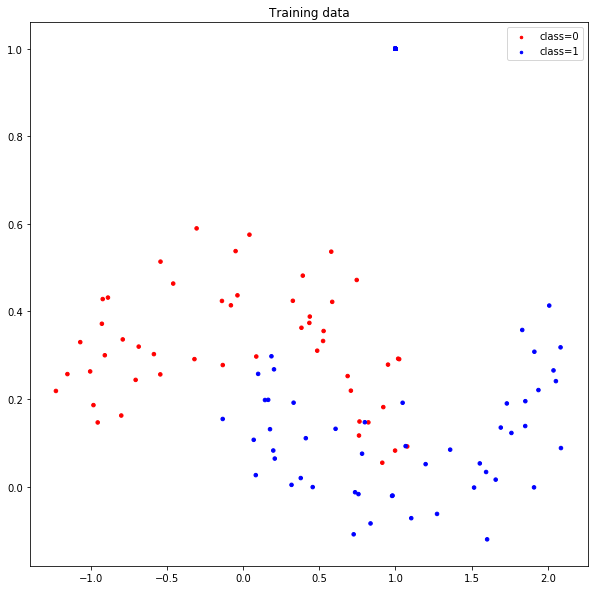

In [239]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the testing data [0.5pt]
<hr>

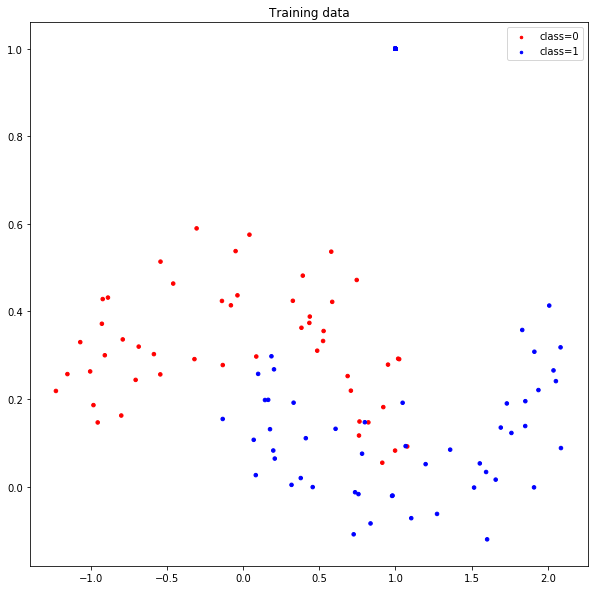

In [240]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
plt.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 3. Plot the learning curve with λ=0.00001\lambda = 0.00001λ=0.00001 [1pt]
<hr>

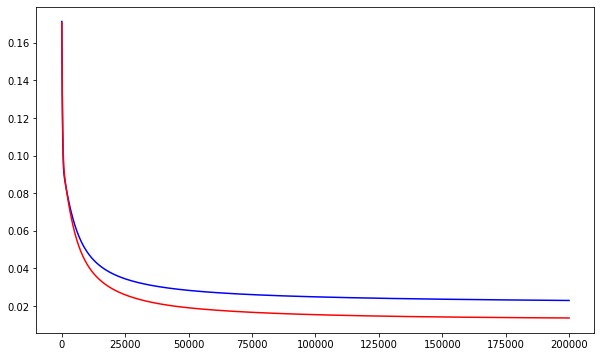

In [409]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c='b')
plt.plot(np.array(range(max_iter)), L_iters_test, c='r')
# plt.xlabel('Iterations')
# plt.ylabel('Loss value')
plt.show()

## 4. Plot the learning curve with λ=0.0001\lambda = 0.0001λ=0.0001 [1pt]
<hr>

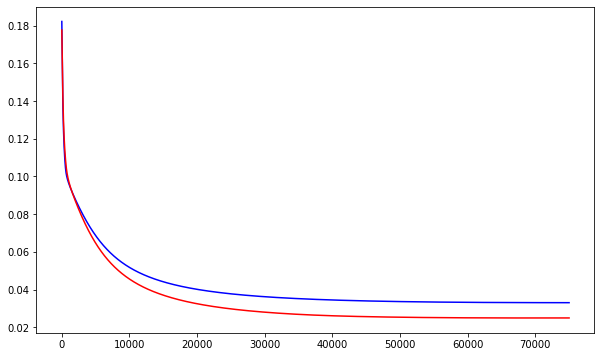

In [412]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c='b')
plt.plot(np.array(range(max_iter)), L_iters_test, c='r')
# plt.xlabel('Iterations')
# plt.ylabel('Loss value')
plt.show()

## 5. Plot the learning curve with λ=0.001\lambda = 0.001λ=0.001 [1pt]
<hr>

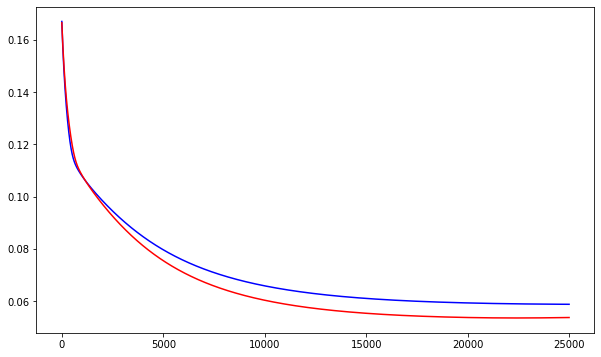

In [426]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c='b')
plt.plot(np.array(range(max_iter)), L_iters_test, c='r')
# plt.xlabel('Iterations')
# plt.ylabel('Loss value')
plt.show()

## 6. Plot the learning curve with λ=0.01\lambda = 0.01λ=0.01 [1pt]
<hr>

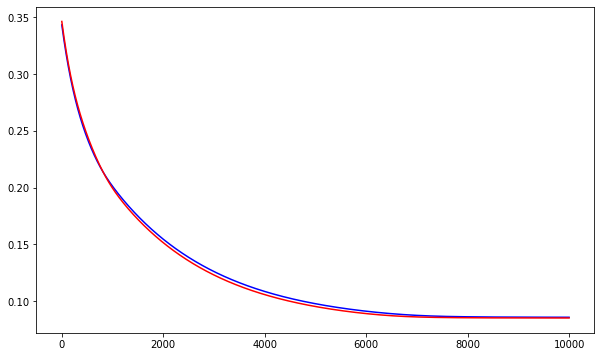

In [430]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c='b')
plt.plot(np.array(range(max_iter)), L_iters_test, c='r')
# plt.xlabel('Iterations')
# plt.ylabel('Loss value')
plt.show()

## 7. Plot the learning curve with λ=0.1\lambda = 0.1λ=0.1 [1pt]
<hr>

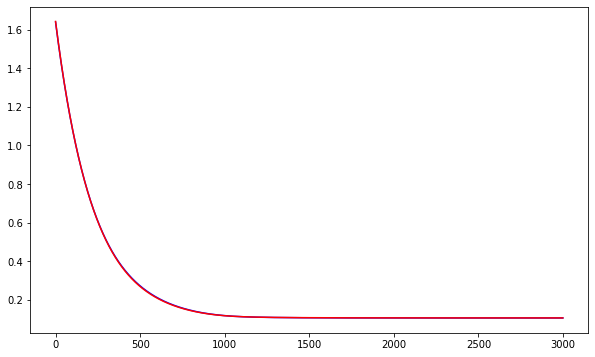

In [446]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train, c='b')
plt.plot(np.array(range(max_iter)), L_iters_test, c='r')
# plt.xlabel('Iterations')
# plt.ylabel('Loss value')
plt.show()

## 8. Plot the probability map of the obtained classifier with λ=0.00001\lambda = 0.00001λ=0.00001 [1pt]
<hr>

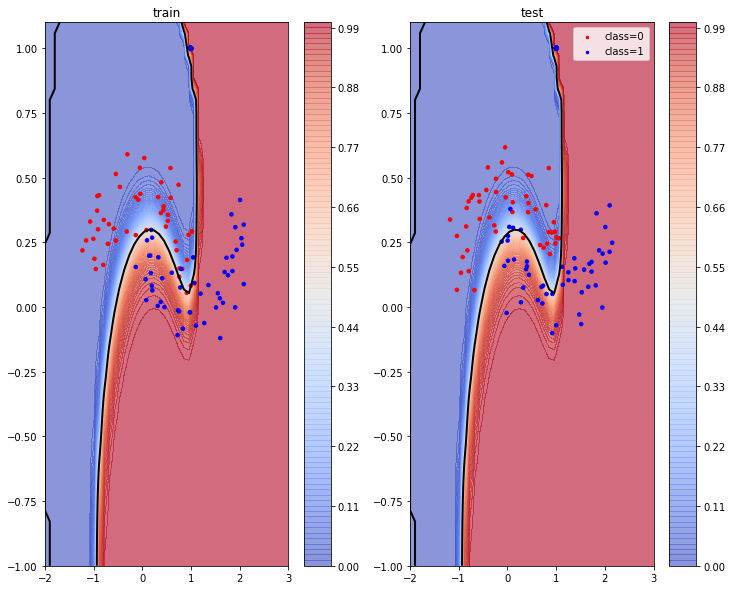

In [419]:
# plot
fig = plt.figure(4,figsize=(12,10))
ax1 = fig.add_subplot(121)
ax1.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax1.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
ax1.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
ax1.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax1.set_title('train')
cbar1 = plt.colorbar(ax)
cbar1.update_ticks()

ax2 = fig.add_subplot(122)
ax2.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax2.scatter(x1_test, x2_test, s=idx_class0_test*50, c='r', marker='.', label='class=0') 
ax2.scatter(x1_test, x2_test, s=idx_class1_test*50, c='b', marker='.', label='class=1')
ax2.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax2.legend()
ax2.set_title('test')
cbar2 = plt.colorbar(ax)
cbar2.update_ticks()

## 9. Plot the probability map of the obtained classifier with λ=0.0001\lambda = 0.0001λ=0.0001 [1pt]
<hr>

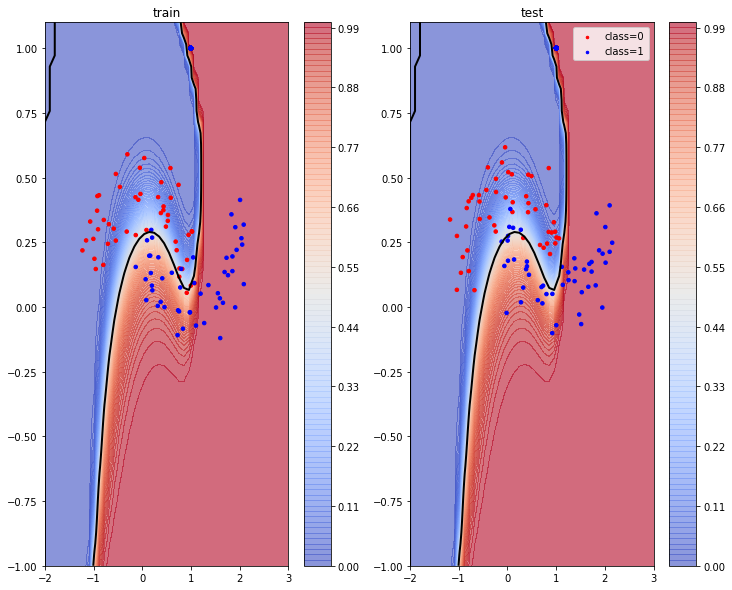

In [415]:
# plot
fig = plt.figure(4,figsize=(12,10))
ax1 = fig.add_subplot(121)
ax1.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax1.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
ax1.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
ax1.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax1.set_title('train')
cbar1 = plt.colorbar(ax)
cbar1.update_ticks()

ax2 = fig.add_subplot(122)
ax2.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax2.scatter(x1_test, x2_test, s=idx_class0_test*50, c='r', marker='.', label='class=0') 
ax2.scatter(x1_test, x2_test, s=idx_class1_test*50, c='b', marker='.', label='class=1')
ax2.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax2.legend()
ax2.set_title('test')
cbar2 = plt.colorbar(ax)
cbar2.update_ticks()

## 10. Plot the probability map of the obtained classifier with λ=0.001\lambda = 0.001λ=0.001 [1pt]
<hr>

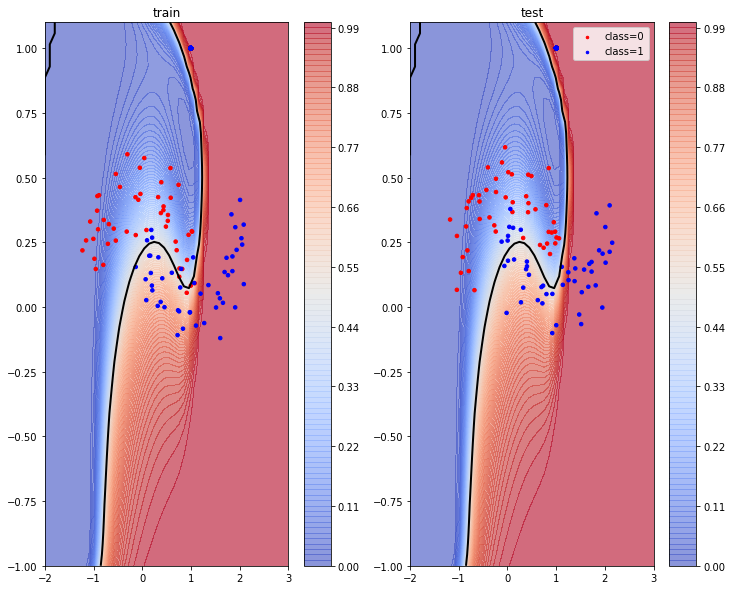

In [427]:
# plot
fig = plt.figure(4,figsize=(12,10))
ax1 = fig.add_subplot(121)
ax1.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax1.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
ax1.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
ax1.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax1.set_title('train')
cbar1 = plt.colorbar(ax)
cbar1.update_ticks()

ax2 = fig.add_subplot(122)
ax2.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax2.scatter(x1_test, x2_test, s=idx_class0_test*50, c='r', marker='.', label='class=0') 
ax2.scatter(x1_test, x2_test, s=idx_class1_test*50, c='b', marker='.', label='class=1')
ax2.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax2.legend()
ax2.set_title('test')
cbar2 = plt.colorbar(ax)
cbar2.update_ticks()

## 11. Plot the probability map of the obtained classifier with λ=0.01\lambda = 0.01λ=0.01 [1pt]
<hr>

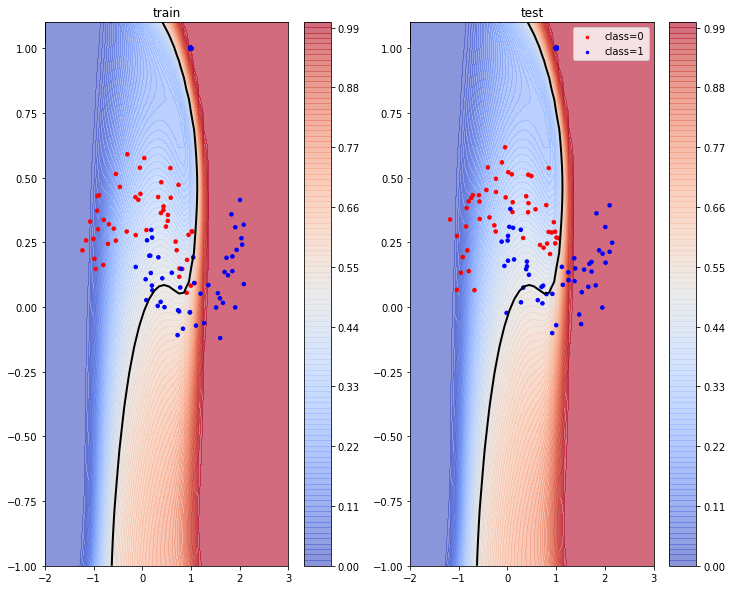

In [434]:
# plot
fig = plt.figure(4,figsize=(12,10))
ax1 = fig.add_subplot(121)
ax1.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax1.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
ax1.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
ax1.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax1.set_title('train')
cbar1 = plt.colorbar(ax)
cbar1.update_ticks()

ax2 = fig.add_subplot(122)
ax2.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax2.scatter(x1_test, x2_test, s=idx_class0_test*50, c='r', marker='.', label='class=0') 
ax2.scatter(x1_test, x2_test, s=idx_class1_test*50, c='b', marker='.', label='class=1')
ax2.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax2.legend()
ax2.set_title('test')
cbar2 = plt.colorbar(ax)
cbar2.update_ticks()

## 12. Plot the probability map of the obtained classifier with λ=0.1\lambda = 0.1λ=0.1 [1pt]
<hr>

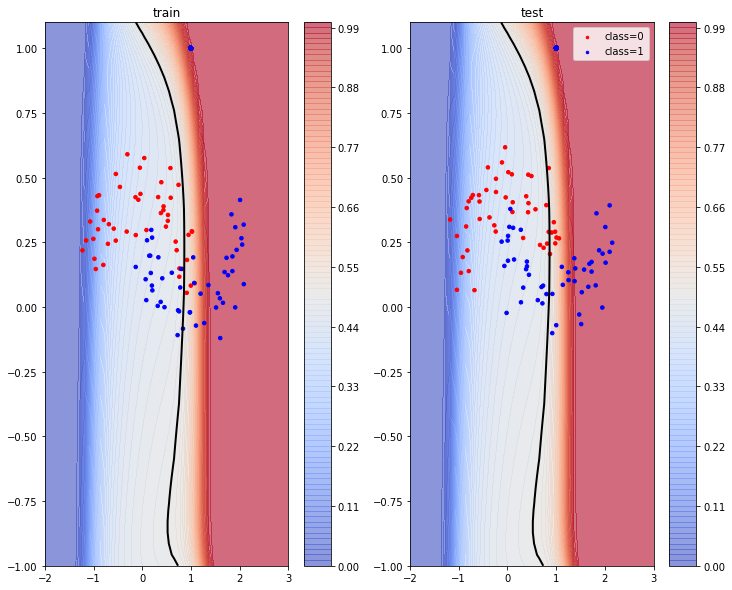

In [445]:
# plot
fig = plt.figure(4,figsize=(12,10))
ax1 = fig.add_subplot(121)
ax1.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax1.scatter(x1_train, x2_train, s=idx_class0_train*50, c='r', marker='.', label='class=0') 
ax1.scatter(x1_train, x2_train, s=idx_class1_train*50, c='b', marker='.', label='class=1')
ax1.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax1.set_title('train')
cbar1 = plt.colorbar(ax)
cbar1.update_ticks()

ax2 = fig.add_subplot(122)
ax2.contourf(xx1, xx2, p_train, 100, vmin=0, vmax=1, cmap='coolwarm', alpha=0.6)
ax2.scatter(x1_test, x2_test, s=idx_class0_test*50, c='r', marker='.', label='class=0') 
ax2.scatter(x1_test, x2_test, s=idx_class1_test*50, c='b', marker='.', label='class=1')
ax2.contour(xx1, xx2, p_train, 1, linewidths=2, colors='k') 
ax2.legend()
ax2.set_title('test')
cbar2 = plt.colorbar(ax)
cbar2.update_ticks()

## 13. Print the final training accuracy with the given regularization parameters [2.5pt]
<hr>

In [467]:
for i in range(5):
    print ('lambda = 1e-'+str(5-i)+', Training Accuracy (%) =', accuracy_train[i])

lambda = 1e-5, Training Accuracy (%) = 98.5
lambda = 1e-4, Training Accuracy (%) = 97.5
lambda = 1e-3, Training Accuracy (%) = 96.0
lambda = 1e-2, Training Accuracy (%) = 90.0
lambda = 1e-1, Training Accuracy (%) = 85.5


## 14. Print the final testing accuracy with the given regularization parameters [2.5pt]
<hr>

In [468]:
for i in range(5):
    print ('lambda = 1e-'+str(5-i)+', Training Accuracy (%) =', accuracy_test[i])

lambda = 1e-5, Training Accuracy (%) = 97.5
lambda = 1e-4, Training Accuracy (%) = 97.0
lambda = 1e-3, Training Accuracy (%) = 96.5
lambda = 1e-2, Training Accuracy (%) = 91.0
lambda = 1e-1, Training Accuracy (%) = 85.0
